# Project 3

# Import General Libraries

In [ ]:
from google.colab import drive
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sys

!pip install surprise

drive.mount('/content/drive/')
sys.path.append('/content/drive/MyDrive')

     |████████████████████████████████| 11.8MB 356kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1615245 sha256=f4ee80b64dceeb38cf39e5d158be70c67711383ef3ea08b12bdcfd80c9c86b41
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise
Mounted at /content/drive/


# MovieLens dataset

In [ ]:
'''
Import dataset
'''

ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv')

In [ ]:
user_1 = ratings_df.loc[0]
print(user_1)

userId               1.0
movieId              1.0
rating               4.0
timestamp    964982703.0
Name: 0, dtype: float64


In [ ]:
'''
Create R matrix
'''

num_users = np.max(np.unique(ratings_df['userId']))
print(num_users)
num_movies = np.max(np.unique(ratings_df['movieId']))
print(num_movies)
R = np.zeros((num_users, num_movies))

# loop through the rows of ratings.df
# the 0th index of each row of ratings_df corresponds to the userId
# the 1st index corresponds to the movieId
# the 2nd index corresponds to rating
num_rows,_ = ratings_df.shape
for i in np.arange(num_rows):
    row_i = ratings_df.loc[i]
    user_id = int(row_i[0]-1)
    movie_id = int(row_i[1]-1)
    rating = row_i[2]
    R[user_id, movie_id] = rating

610
193609


In [ ]:
print(R)

[[4.  0.  4.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [2.5 2.  2.  ... 0.  0.  0. ]
 [3.  0.  0.  ... 0.  0.  0. ]
 [5.  0.  0.  ... 0.  0.  0. ]]


## Question 1

In [ ]:
'''
Compute sparcity of movie ratings dataset
'''

existing_ratings = len(ratings_df['rating']) #has 100836 rows / 4 columns


number_of_users = ratings_df['userId'].nunique()
num_movies = ratings_df['movieId'].nunique()
num_users = np.max(np.unique(ratings_df['userId']))

print('number of users is', num_users)
print('number of movies is',num_movies)
print('existing ratings', existing_ratings)

Sparcity = existing_ratings / (number_of_users * num_movies)


print('The sparcity level of the dataset is {}'.format((Sparcity)))

number of users is 610
number of movies is 9724
existing ratings 100836
The sparcity level of the dataset is 0.016999683055613623


In [ ]:
ratings = ratings_df['rating']
movies_index= ratings_df['movieId']
print(movies_index[0])


1


## Question 2

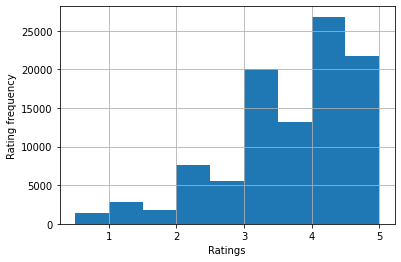

In [ ]:
'''
Plot histogram showing frequency of rating values
'''

ax = ratings_df['rating'].hist(bins=[0.5,1.0,1.5,2.0,2.5,3.0, 3.5, 4.0, 4.5, 5.0],) 
ax.set_xlabel("Ratings")
ax.set_ylabel("Rating frequency") 

x=ratings_df.groupby(['movieId', 'rating'])#agg(['count', 'sum'])
groups = dict(list(x))
#groups

## Question 3

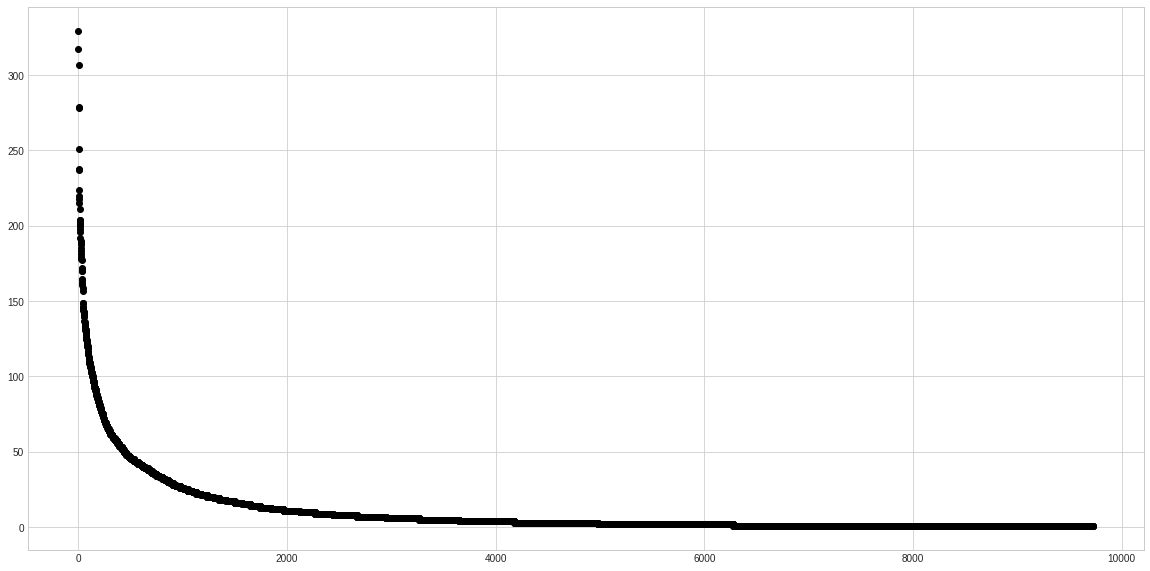

In [ ]:
'''
Plot distribution of the number of rating recieved among movies
'''


number_of_ratings = np.zeros(num_movies)
mv_index = []



for i in range(0,existing_ratings):
    id  = int(movies_index[i])
    if id in mv_index:
        ind = np.where(mv_index == id)
        ind = int(ind[0])
        number_of_ratings[ind] = number_of_ratings[ind] + 1
    else:
        mv_index = np.append(mv_index,id)
        ind = np.where(mv_index == id)
        ind = int(ind[0])
        number_of_ratings[ind] = 1
        


#print(np.max(number_of_ratings))
number_of_ratings = number_of_ratings[0:len(mv_index)]
combined = np.column_stack((mv_index,number_of_ratings,))
a = combined
a = a[a[:,1].argsort()]
a = np.flip(a,0)



%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(range(len(mv_index)),a[:,1], 'o', color='black');


In [ ]:
popular = []
unpopular = []


for i in range(0,len(a[:,0])):
    if a[i,1] > 2:
        popular.append(a[i,0])
    else:
        unpopular.append(a[i,0])


print(len(popular))
print(len(unpopular))
print(len(a[:,0]))

4980
4744
9724


## Question 4

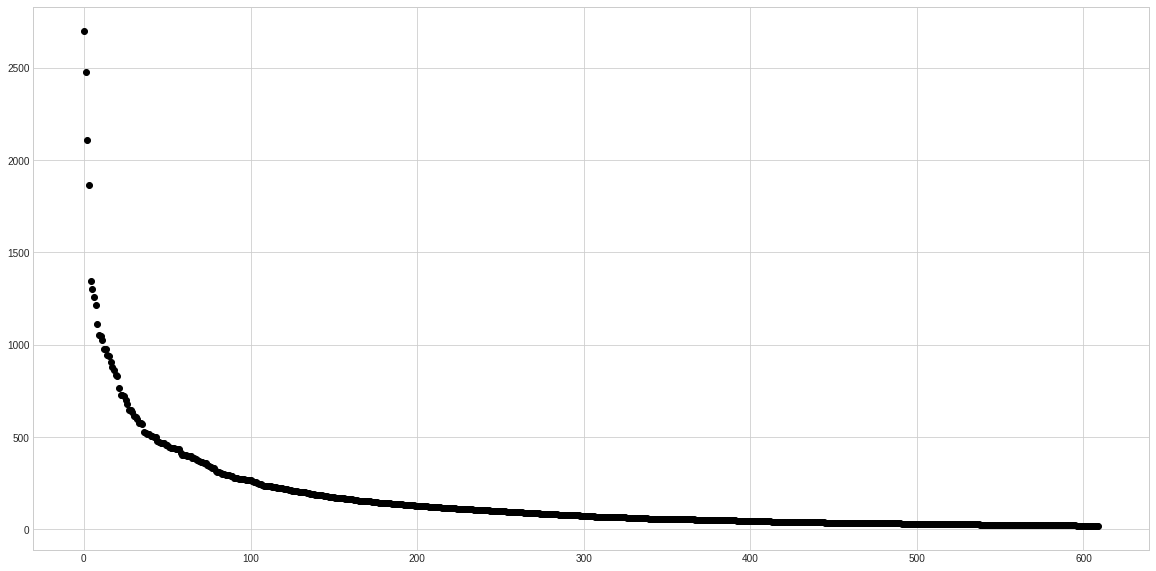

In [ ]:
'''
Plot distribution of the number of rating given among users
'''


number_of_ratings = np.zeros(num_users)
us_index = []

users_index= ratings_df['userId']

for i in range(0,existing_ratings):
    id  = int(users_index[i])
    if id in us_index:
        ind = np.where(us_index == id)
        ind = int(ind[0])
        number_of_ratings[ind] = number_of_ratings[ind] + 1
    else:
        us_index = np.append(us_index,id)
        ind = np.where(us_index == id)
        ind = int(ind[0])
        number_of_ratings[ind] = 1
        


#print(np.max(number_of_ratings))
number_of_ratings = number_of_ratings[0:len(us_index)]
combined = np.column_stack((us_index,number_of_ratings,))
a = combined
a = a[a[:,1].argsort()]
a = np.flip(a,0)



%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(range(len(us_index)),a[:,1], 'o', color='black');

## Question 6

1


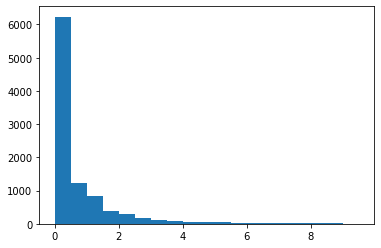

In [ ]:
'''
Plot the variance of the rating values receieved by each movie in bins
'''
from matplotlib import pyplot as plt
ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv')
num_movies = np.max(np.unique(ratings_df['movieId']))
#print(ratings_df)
mov_id = ratings_df['movieId']
rating = ratings_df['rating']
mean = np.zeros(num_movies+1)
num_ratings = np.zeros(num_movies+1)
temp = 0

temp = mov_id[0]
print(temp)
for i in range(0,len(mov_id)):
    temp = mov_id[i]
    mean[temp] = mean[temp] + rating[i]
    num_ratings[temp] =  num_ratings[temp] + 1
    

avg_mean = np.zeros(num_movies+1)
for i in range(0,len(mov_id)):
    temp = mov_id[i]
    avg_mean[temp] = mean[temp]/num_ratings[temp]
#print(len(avg_mean))
squared_diff = np.zeros(num_movies+1)
for j in range(0,len(rating)):
    temp = mov_id[j]
    temp1 = avg_mean[temp]
    temp2 = rating[j] - temp1
    temp3 = temp2*temp2
    squared_diff[j] = temp3

sum_sq_diff = np.zeros(num_movies+1)
for i in range(0,len(rating)):
    temp = mov_id[i]
    sum_sq_diff[temp] = sum_sq_diff[temp] + squared_diff[temp]
#print(sum_sq_diff)
variance = np.zeros(num_movies+1)
only_real = []
for j in range(0,num_movies+1):
    if num_ratings[j] != 0:
        variance[j] = sum_sq_diff[j]/num_ratings[j]
        only_real.append(variance[j])
#print(np.max(variance))

bins = np.arange(0, 10, 0.5)

plt.hist(only_real,bins = bins)
plt.show()

# Neighborhood-based collaborative filtering

## Question 10

I am on  2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE = 1.0194218846107304
I am on  4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson simila

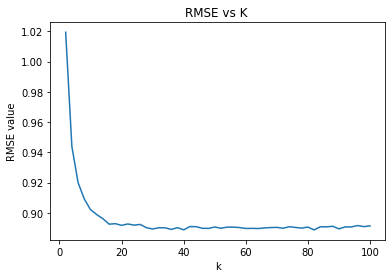

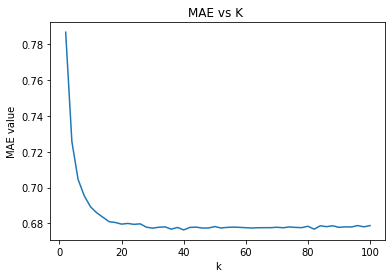

In [ ]:
'''Sweep k from 2 to 100 in steps of two, and plot rmse/mae vs k'''


from surprise.model_selection.validation import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
import numpy as np
import pandas as pd

from google.colab import files


import matplotlib.pyplot as plt 
import time
all_results=[]
def plot_results(ks, cv_results):

    plt.xlabel('k')
    plt.ylabel('RMSE value')
    plt.title('RMSE vs K ')
    plt.plot( ks,cv_results[0,:])
   # plt.legend(['RMSE', 'MAE'])
    plt.show()

    plt.xlabel('k')
    plt.ylabel('MAE value')
    plt.title('MAE vs K ')
    plt.plot( ks, cv_results[1,:])
    plt.show()
    #'rmse is root mean square error'
    


def knn_cross_validation(data):
    
    #cv_results = np.zeros((2,50)) # need one column 
    sim_options = {'name': 'pearson'}

    number_of_folds = 10
    timenow= time.time()
    idx=0
    for k in range(2,101,2):
        print('I am on ', k )
        algo = KNNWithMeans(k=k, sim_options=sim_options)

        cv = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=number_of_folds, verbose=False)
        cv_results[0,idx] = np.mean(cv['test_rmse'])
        cv_results[1,idx] = np.mean(cv['test_mae'])
        all_results.append(cv_results)

        a=cv_results[0, idx]
        b=cv_results[1, idx]

        print('RMSE = {}'.format((a))) #had to break it up, otherwise positional arguement error
        #print('MAE = {}'.format((b)))
        idx += 1
        # results_df =pd.DataFrame({k: [a, b]})
        # results_df.to_csv('{} results.csv'.format(k)) 
        # files.download('{} results.csv'.format(k))
    print('This took {} seconds'.format(time.time()-timenow))
    ks = np.arange(2,101,2)
    
    
    plot_results(ks,cv_results )

ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv')  
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)
cv_results = np.zeros((2,50))
knn_cross_validation(data)
  



##Question 11


In [ ]:
'''Report the average RMSE and average MAE value for the minimum k found in Question 10'''

print('The RMSE value for k = 14 is {}'.format(cv_results[0,14]))
print('The MAE value for k = 14 is {}'.format(cv_results[1,14]))


The RMSE value for k = 14 is 0.8892693748711421
The MAE value for k = 14 is 0.6773293379151676


## Question 12-14

In [ ]:
'''
Define functions used in Questions 24-29
'''

from surprise import Reader
from surprise import Dataset
from surprise.prediction_algorithms.matrix_factorization import SVD 
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import accuracy
import matplotlib.pyplot as plt
from surprise.model_selection.validation import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
import numpy as np
import pandas as pd

class MF_Bias:
    '''
    Class to design an 10-fold cross validation using MF w/ bias collaborative
    filtering over different values of k
    '''

    def __init__(self, ratings_df, k, trim=False):
        '''
        data: data this is performed on; a DataFrame
        k: a list storing the values of k
        '''
        if trim==True:
            self.ratings_df = ratings_df

            # count number of ratings
            self.num_ratings = count_movie_ratings(self.ratings_df)

            # define popular movies: movies that have recieved more than 2 ratings
            self.popular = np.where(self.num_ratings > 2)[0] 

            # define high-variance movies: movies that have recieved at least 5
            # ratings and have variance of rating values recieved of at least 2
            var_movies = count_movie_variability(self.ratings_df)
            self.high_var = []
            for i in np.where(self.num_ratings >= 5)[0]:
                if len(np.unique(var_movies[i:])) >= 2:
                    self.high_var.append(i)

        # load data in format that SVD can use
        reader = Reader(rating_scale=(1.0,5.0))
        self.data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']],
                                         reader=reader) 
        self.k = k


    def trim_popular(self, testset):
        '''
        Trims testset so that only movies in popular and unpopular trimmed
        subsets movies remain

        Returns trimmed testset lists
        '''
        pop_test = []
        unpop_test = []
        for i in np.arange(len(testset)):
            for j in self.popular:
                # if movie is in the popular subset
                if j == testset[i][1]:
                    pop_test.append(testset[i])
                    break
                # since subset_movies is ordered from least to greatest,
                # if j > testset[i][1], then we know testset[i][1] is not in 
                # popular set, so therefore it is in the unpopluar set
                elif j > testset[i][1]:
                    unpop_test.append(testset[i])
                    break 
        return pop_test, unpop_test


    def trim_var(self, testset):
        '''
        Trims testset so that only movies in high variance trimmed movies subsets
        movies remain

        Returns trimmed testset lists
        '''
        var_test = []
        for i in np.arange(len(testset)):
            for j in np.arange(len(self.high_var)):
                # if movie is in the popular subset
                if j == testset[i][1]:
                    var_test.append(testset[i])
                    break
                # since subset_movies is ordered from least to greatest,
                # if j > testset[i][1], then we know testset[i][1] is not in 
                # high variance data set
                elif j > testset[i][1]:
                    break
        return var_test


    def predict(self):
        '''
        Performs 10-fold cv over different values of k for full data set

        Returns average RMSE and MAE for each value of k
        '''
        rmse = np.zeros(len(self.k))
        mae = np.zeros(len(self.k))
        for i in np.arange(len(k)):
            print(k[i])
            sim_options = {'name': 'pearson'}
            algo = KNNWithMeans(k=k[i], sim_options=sim_options)
            mf_bias = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
            #mf_bias = cross_validate(algo=SVD(n_factors=k[i], biased=True),
                            # data=self.data, cv=10, n_jobs=-1)
            rmse[i] = mf_bias['test_rmse'].mean()
            mae[i] = mf_bias['test_mae'].mean()
        
        return rmse, mae


    def predict_trim(self):
        '''
        Trains the MF w/ bias collaborative filter across 10-folds for different
        values of k and evaluates performance on popular, unpopular, and high
        variance validation sets

        Returns average RMSE across folds for all trimmed test sets
        '''

        rmse_pop = np.zeros(len(self.k))
        rmse_unpop = np.zeros(len(self.k))
        rmse_var = np.zeros(len(self.k))
        sim_options = {'name': 'pearson'}
        for i in np.arange(len(self.k)):
            print(k[i])

            # split data in 10 folds
            kf = KFold(n_splits=10)
            # define MF w/ bias collaborative filter

            mf_bias = KNNWithMeans(k=k[i], sim_options=sim_options)
            #mf_bias = SVD(n_factors=k[i], biased=True)
            
            

            total_RMSE_pop = 0 
            total_RMSE_unpop = 0
            total_RMSE_var = 0
            for trainset, testset in kf.split(self.data):

                # train and test algorithm
                mf_bias.fit(trainset)
                pop_test, unpop_test = self.trim_popular(testset) 
                var_test = self.trim_var(testset)
                pred_pop = mf_bias.test(pop_test)
                pred_unpop = mf_bias.test(unpop_test)
                pred_var = mf_bias.test(var_test)

                # compute RMSEs for fold
                total_RMSE_pop += accuracy.rmse(pred_pop, verbose=False)
                total_RMSE_unpop += accuracy.rmse(pred_unpop, verbose=False)
                total_RMSE_var += accuracy.rmse(pred_var, verbose=False)
                
            rmse_pop[i] = total_RMSE_pop / 10
            rmse_unpop[i] = total_RMSE_unpop / 10
            rmse_var[i] = total_RMSE_var / 10
            
            print("Popular RMSE: ", rmse_pop[i])
            print("Unpopular RMSE: ", rmse_unpop[i])
            print("High variation RMSE: ", rmse_var[i])
            print()

        return rmse_pop, rmse_unpop, rmse_var


def plot_rmse_mae(rmse, mae=None):
    '''
    Plots RMSE and MAE as a function of k
    '''

    if mae is not None:
        # Plot MAE as a function of k
        plt.plot(k, mae)
        plt.title("k versus MAE")
        plt.xlabel("k")
        plt.xticks(k)
        plt.ylabel("MAE")
        plt.show()
        
    # Plot RMSE as a function of k
    plt.plot(k, rmse)
    plt.title("k versus RMSE")
    plt.xlabel("k")
    plt.xticks(k)
    plt.ylabel("RSME")
    plt.show()


def report_lowest_RMSE(rmse, k):
    '''
    Returns minimum average RMSE value
    '''
    print("Minimum RMSE value: ", np.min(rmse))
    print("at k: ", k[np.argmin(rmse)])
    return np.min(rmse)

def report_lowest_MAE(mae, k):
    '''
     Returns minimum average MAE value
    '''
    print("Minimum MAE value: ", np.min(mae))
    print("at k: ", k[np.argmin(mae)])
    return np.min(mae)



def count_movie_ratings(ratings_df):
    '''
    Counts the number of times each movie was rated

    Returns an array where the index corresonds to the movieId and the value of 
    the index corresponds to the number of times the movie was rated
    '''
    num_movies = np.max(np.unique(ratings_df['movieId']))
    num_ratings = np.zeros(num_movies)
    # loop through the rows of ratings.df and count the number of times each 
    # movie was rated
    for i in np.arange(ratings_df.shape[0]):
        row_i = ratings_df.loc[i]
        movie_id = int(row_i[1]-1)
        num_ratings[movie_id] += 1
    return num_ratings


def count_movie_variability(ratings_df):
    '''
    Counts the variability in movie ratings

    Returns an array where the index corresponds to the movieId and the value of
    each column corresponds to the number of times the movie was given 
    rating = (column # +1) 
    '''
    num_movies = np.max(np.unique(ratings_df['movieId']))
    var_ratings = np.zeros((num_movies, 5))
    # loop through the rows of ratings.df and count the number of times each 
    # movie was given a certain ratings
    for i in np.arange(ratings_df.shape[0]):
        row_i = ratings_df.loc[i]
        movie_id = int(row_i[1]-1)
        rating = int(row_i[2])
        var_ratings[movie_id, rating-1] += 1
    return var_ratings

In [ ]:
''' 
Perform 10-fold cross-validation using a knn collaborative filer on the 
populur, unpopular, and high variance movie subsets
'''

# load data 
ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv') 


# compute RMSE as a function of k for each trimmed data set
k = np.arange(2, 51, 2)
mfb = MF_Bias(ratings_df, k, trim=True)
rmse_pop, rmse_unpop, rmse_var = mfb.predict_trim()

2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Popular RMSE:  1.0244899559981
Unpopular RMSE:  1.0121621678439705
High variation RMSE:  1.039135146726515

4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix..

RMSE for Popular Movies


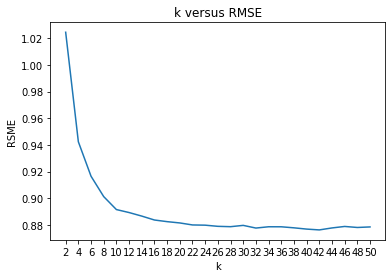



Minimum RMSE value:  0.8763318701621925
at k:  42
Minimum avg RMSE:  0.8763318701621925
RMSE for Unpopular Movies


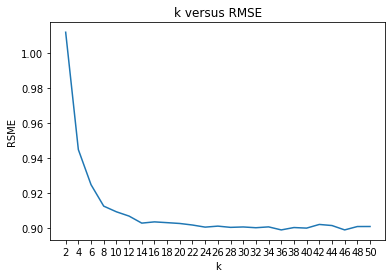



Minimum RMSE value:  0.8988976004135416
at k:  36
Minimum avg RMSE:  0.8988976004135416
RMSE for High Variance Movies


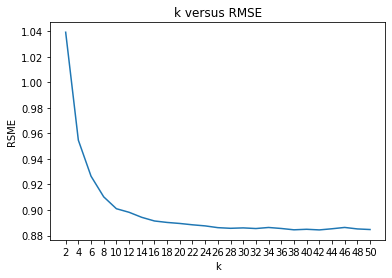



Minimum RMSE value:  0.8844380531227877
at k:  42
Minimum avg RMSE:  0.8844380531227877


In [ ]:
print("RMSE for Popular Movies")
plot_rmse_mae(rmse_pop)
print()
print()
print("Minimum avg RMSE: ", report_lowest_RMSE(rmse_pop, k))


print("RMSE for Unpopular Movies")
plot_rmse_mae(rmse_unpop)
print()
print()
print("Minimum avg RMSE: ", report_lowest_RMSE(rmse_unpop, k))

print("RMSE for High Variance Movies")
plot_rmse_mae(rmse_var)
print()
print()
print("Minimum avg RMSE: ", report_lowest_RMSE(rmse_var, k))

## Question 15


Computing the pearson similarity matrix...
Done computing similarity matrix.
(607, 3016, 4.0)
[Prediction(uid=607, iid=3016, r_ui=4.0, est=3.4115294518966297, details={'actual_k': 8, 'was_impossible': False}), Prediction(uid=78, iid=296, r_ui=4.0, est=3.8566118595509975, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=57, iid=3255, r_ui=3.0, est=3.5901385785887467, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=328, iid=68358, r_ui=4.0, est=3.3898713463708634, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=590, iid=260, r_ui=5.0, est=4.227644002578873, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=307, iid=553, r_ui=4.5, est=3.031812883866614, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=603, iid=2865, r_ui=4.0, est=3.501691422778561, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}), Prediction(uid=606, iid=924, r_ui=5.0, est=4.277006970179883, details={'actu

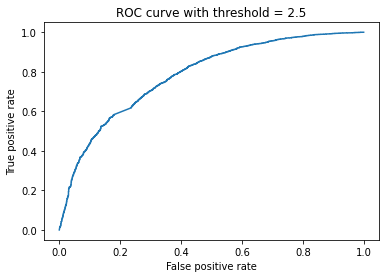

The area under the curve (AUC) value is 0.783143272653317
Computing the pearson similarity matrix...
Done computing similarity matrix.
(274, 1370, 3.5)
[Prediction(uid=274, iid=1370, r_ui=3.5, est=3.17455592896545, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=268, iid=2490, r_ui=2.0, est=3.1738401956490536, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=372, iid=356, r_ui=3.0, est=3.9805714380397372, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=464, iid=1617, r_ui=5.0, est=4.370052288972877, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=260, iid=3556, r_ui=4.5, est=3.804690474717699, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=597, iid=1573, r_ui=3.0, est=3.4300128301665875, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=477, iid=542, r_ui=0.5, est=2.968978016129728, details={'actual_k': 9, 'was_impossible': False}), Prediction(uid=380, iid=1125, r_ui=4.0, est

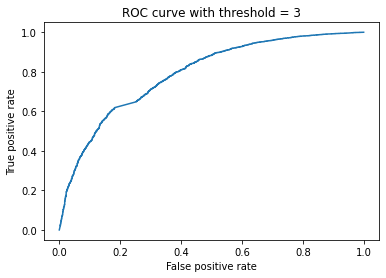

The area under the curve (AUC) value is 0.7908626570017433
Computing the pearson similarity matrix...
Done computing similarity matrix.
(47, 2028, 4.0)
[Prediction(uid=47, iid=2028, r_ui=4.0, est=3.6540885887938495, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=139, iid=99114, r_ui=2.5, est=2.31769328785598, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=319, iid=58559, r_ui=5.0, est=4.966009250711095, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=580, iid=919, r_ui=2.0, est=2.8990523110065847, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=68, iid=85780, r_ui=2.5, est=3.6158376021703194, details={'actual_k': 5, 'was_impossible': False}), Prediction(uid=89, iid=1136, r_ui=2.5, est=3.692805677807553, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=18, iid=60756, r_ui=3.0, est=3.4648808604335457, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=28, iid=161, r_ui=3.0, est

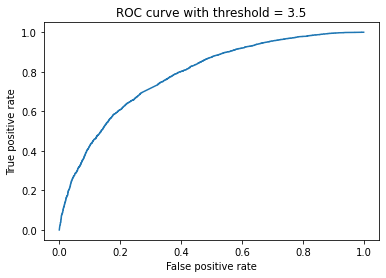

The area under the curve (AUC) value is 0.7838432232467198
Computing the pearson similarity matrix...
Done computing similarity matrix.
(608, 2571, 5.0)
[Prediction(uid=608, iid=2571, r_ui=5.0, est=3.61696378270811, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=266, iid=1376, r_ui=1.0, est=3.388026908438668, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=590, iid=296, r_ui=4.5, est=4.229955616181516, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=273, iid=252, r_ui=3.0, est=3.748229518473319, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=297, iid=1645, r_ui=3.0, est=2.5751366224356262, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=602, iid=39, r_ui=5.0, est=3.295833980643215, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=57, iid=2393, r_ui=2.0, est=3.0985973310848225, details={'actual_k': 14, 'was_impossible': False}), Prediction(uid=414, iid=4886, r_ui=4.0, est=3

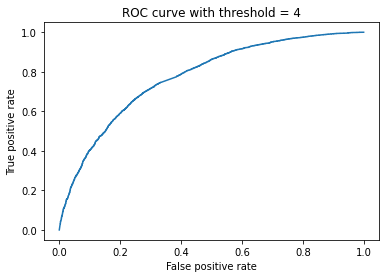

The area under the curve (AUC) value is 0.7749395905807956


In [ ]:
'''
Plot the ROC for the K-NN collaborative filter for the threshold values [ 2.5, 3, 3.5, 4]

For each of the plots, also report the area under the curve
''''


from surprise.model_selection.validation import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from surprise.model_selection.split import train_test_split


threshold_vals = [ 2.5, 3, 3.5, 4]

ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv')  
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

sim_options={'name': 'pearson'}
for threshold in threshold_vals:
    algo = KNNWithMeans(k=14, sim_options={'name': 'pearson'}) 
    trainset, testset = train_test_split(data, test_size=0.1)
    algo.fit(trainset)
    pred = algo.test(testset)
    print(testset[0])
    print(pred)
    y_true = []
    y_score = []
    #each is a column for the testset
    ###checking the  rating against the threshold.
    for i in range(len(pred)):
        y_score.append(pred[i].est)

        if testset[i][2] >= threshold: #ratings threshold
            y_true.append(1)
        else:
            y_true.append(0)
 
          
    #print('this', y_true)        
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    auc_ = roc_auc_score(y_true,  y_score)

    plt.plot(fpr,tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve with threshold = {}'.format(threshold))
    plt.show()
    print('The area under the curve (AUC) value is {}'.format(auc_))

# Model-based collaborative filtering

## Non-negative matrix factorization (NNMF)

### Question 17

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
from surprise import Reader
from surprise import Dataset

class NNMF:
    '''
    Class to design a 10-fold cross validation using NNMF collaborative
    filtering over different values of k
    '''
    def __init__(self, data, k):
       
        '''
        data: data this is performed on; a DataFrame
        k: a list storing the values of k
        '''

        self.data = data
        self.k = k
        self.poprmse = np.zeros(len(k))
        self.popmae = np.zeros(len(k))
        self.unpoprmse = np.zeros(len(k))
        self.unpopmae = np.zeros(len(k))
        self.highvarrmse = np.zeros(len(k))
        self.highvarmae = np.zeros(len(k))

    def cv_over_k_pop(self):
        '''
        Performs 10-fold cv over different values of k for popular trimmed dataset
        '''

        from surprise.model_selection.split import KFold
        from surprise import accuracy
        ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv') 
        reader = Reader(rating_scale=(0.5,5.0))
        train_data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader=reader)
        kf = KFold(n_splits=10)
        k = self.k
        
        for i in range(0,len(k)):
            print(i)
            popmae = 0
            poprmse = 0
           
            print(k[i])
            n_factors = k[i]
            inc = 1
            for trainset, testset in kf.split(train_data):
                print(inc)
                inc = inc+1
                nnmf = NMF(n_factors=n_factors, biased=False)
                nnmf.fit(trainset)
                pop_test = []
                unpop_test = []
                ## these have weird variables because of contradictions
                for j in range(0,len(testset)):
                    for o in popular:
                        if o == testset[j][1]:
                            #print(testset[j][1])
                            #print(i)
                            pop_test.append(testset[j][:])
                #print(len(testset))
                #print(len(pop_test))
                #print(len(unpop_test))
                poppredictions = nnmf.test(pop_test)
                poprmse = poprmse + accuracy.rmse(poppredictions,verbose = False)
                popmae = popmae + accuracy.mae(poppredictions,verbose = False)
            self.poprmse[i] = poprmse/10
            self.popmae[i] = popmae/10


    def cv_over_k_unpop(self):
        
        '''
        Performs 10-fold cv over different values of k for unpopular trimmed dataset
        '''

        from surprise.model_selection.split import KFold
        from surprise import accuracy
        ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv') 
        reader = Reader(rating_scale=(0.5,5.0))
        train_data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader=reader)
        kf = KFold(n_splits=10)
        k = self.k
        
        for i in range(0,len(k)):
            print(i)
            
            unpopmae = 0
            unpoprmse = 0
            print(k[i])
            n_factors = k[i]
            inc = 1
            for trainset, testset in kf.split(train_data):
                print(inc)
                inc = inc+1
                nnmf = NMF(n_factors=n_factors, biased=False)
                nnmf.fit(trainset)
                
                unpop_test = []
                ## these have weird variables because of contradictions
                for j in range(0,len(testset)):
                    for l in unpopular:
                        if l == testset[j][1]:
                            #print(testset[j][1])
                            #print(i)
                            unpop_test.append(testset[j][:])
                #print(len(testset))
                #print(len(pop_test))
                #print(len(unpop_test))
                unpoppredictions = nnmf.test(unpop_test)
                unpoprmse = unpoprmse + accuracy.rmse(unpoppredictions,verbose = False)
                unpopmae = unpopmae + accuracy.mae(unpoppredictions,verbose = False)
            self.unpoprmse[i] = unpoprmse/10
            self.unpopmae[i] = unpopmae/10

    def cv_over_k_highvar(self):
        
        '''
        Performs 10-fold cv over different values of k for high variance trimmed dataset
        '''

        from surprise.model_selection.split import KFold
        from surprise import accuracy
        ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv') 
        reader = Reader(rating_scale=(0.5,5.0))
        train_data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader=reader)
        kf = KFold(n_splits=10)
        k = self.k
        
        for i in range(0,len(k)):
            print(i)
            
            highvarmae = 0
            highvarrmse = 0
            print(k[i])
            n_factors = k[i]
            inc = 1
            for trainset, testset in kf.split(train_data):
                print(inc)
                inc = inc+1
                nnmf = NMF(n_factors=n_factors, biased=False)
                nnmf.fit(trainset)
                
                highvar_test = []
                ## these have weird variables because of contradictions
                for j in range(0,len(testset)):
                    for l in high_var:
                        if l == testset[j][1]:
                            #print(testset[j][1])
                            #print(i)
                            highvar_test.append(testset[j][:])
                #print(len(testset))
                #print(len(pop_test))
                #print(len(unpop_test))
                highvarpredictions = nnmf.test(highvar_test)
                highvarrmse = highvarrmse + accuracy.rmse(highvarpredictions,verbose = False)
                highvarmae = highvarmae + accuracy.mae(highvarpredictions,verbose = False)
            self.highvarrmse[i] = highvarrmse/10
            self.highvarmae[i] = highvarmae/10
    
    
    def plot_rmse_mae_pop(self):
        
        '''
        Plots RMSE and MAE as a function of k for popular trimmed dataset
        '''

        # Plot RMSE as a function of k
        plt.plot(self.k, self.poprmse)
        plt.title("k versus RMSE for Popular Dataset for NNMF")
        plt.xlabel("k")
        plt.xticks(self.k)
        plt.ylabel("RSME")
        plt.show()

        # Plot MAE as a function of k
        plt.plot(self.k, self.popmae)
        plt.title("k versus MAE for Popular Dataset for NNMF")
        plt.xlabel("k")
        plt.xticks(self.k)
        plt.ylabel("MAE")
        plt.show()
    
    
    def plot_rmse_mae_unpop(self):
       
        '''
        Plots RMSE and MAE as a function of k for unpopular trimmed dataset
        '''
    

        # Plot RMSE as a function of k
        plt.plot(self.k, self.unpoprmse)
        plt.title("k versus RMSE for Unpopular Datasetfor NNMF")
        plt.xlabel("k")
        plt.xticks(self.k)
        plt.ylabel("RSME")
        plt.show()

        # Plot MAE as a function of k
        plt.plot(self.k, self.unpopmae)
        plt.title("k versus MAE for Unpopular Dataset for NNMF")
        plt.xlabel("k")
        plt.xticks(self.k)
        plt.ylabel("MAE")
        plt.show()
        
        
    def plot_rmse_mae_highvar(self):
       
        '''
        Plots RMSE and MAE as a function of k for high variance trimmed dataset
        '''

        # Plot RMSE as a function of k
        plt.plot(self.k, self.highvarrmse)
        plt.title("k versus RMSE for High Variance Dataset for NNMF")
        plt.xlabel("k")
        plt.xticks(self.k)
        plt.ylabel("RSME")
        plt.show()

        # Plot MAE as a function of k
        plt.plot(self.k, self.highvarmae)
        plt.title("k versus MAE for High Variance Dataset for NNMF")
        plt.xlabel("k")
        plt.xticks(self.k)
        plt.ylabel("MAE")
        plt.show()
        
    def report_lowest_RMSE_pop(self):
        '''
        Returns minimum average RMSE value for popular trimmed dataset
        '''
        return np.amin(self.poprmse)


    def report_lowest_MAE_pop(self):
        '''
        Returns minimum average MAE value for popular trimmed dataset
        '''
        return np.amin(self.popmae)
    
    def report_lowest_RMSE_unpop(self):
        '''
        Returns minimum average RMSE value for unpopular trimmed dataset
        '''
        return np.amin(self.unpoprmse)


    def report_lowest_MAE_unpop(self):
        '''
        Returns minimum average MAE value for unpopular trimmed dataset
        '''
        return np.amin(self.unpopmae)
    
    def report_lowest_RMSE_highvar(self):
        '''
        Returns minimum average RMSE value for high variance trimmed dataset
        '''
        return np.amin(self.highvarrmse)


    def report_lowest_MAE_highvar(self):
        '''
        Returns minimum average MAE value for high variance trimmed dataset
        '''

        return np.amin(self.highvarmae)

In [ ]:
'''
Perform 10-fold cross-validation using an NNMF collaborative filter
and print RMSE and MAE as a function of k
'''

from surprise import Reader
from surprise import Dataset
from surprise.model_selection.split import KFold
from surprise import accuracy
ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv') 
reader = Reader(rating_scale=(0.5,5.0))
train_data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader=reader)
kf = KFold(n_splits=10)
k = np.arange(2, 51, 2)
rmse = np.zeros(len(k))
mae = np.zeros(len(k))
for i in range(0,len(k)):
    
    
    mae_temp = 0
    rmse_temp = 0
    print(k[i])
    n_factors = k[i]
    
    for trainset, testset in kf.split(train_data):
        
        inc = inc+1
        nnmf = NMF(n_factors=n_factors, biased=False)
        nnmf.fit(trainset)
        
        predictions = nnmf.test(testset)
        rmse_temp = rmse_temp + accuracy.rmse(predictions,verbose = False)
        mae_temp = mae_temp + accuracy.mae(predictions,verbose = False)
    rmse[i] = rmse_temp/10
    mae[i] = mae_temp/10

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


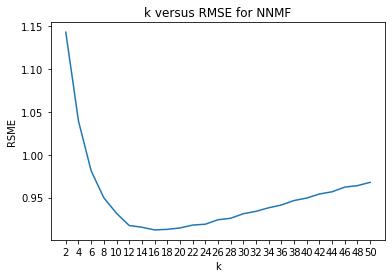

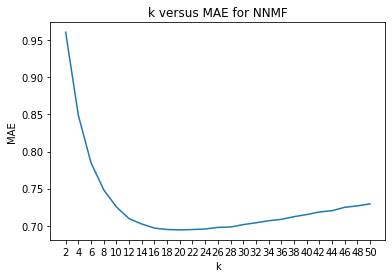

In [ ]:
# Plot RMSE as a function of k
plt.plot(k, rmse)
plt.title("k versus RMSE for NNMF")
plt.xlabel("k")
plt.xticks(k)
plt.ylabel("RSME")
plt.show()

# Plot MAE as a function of k
plt.plot(k, mae)
plt.title("k versus MAE for NNMF")
plt.xlabel("k")
plt.xticks(k)
plt.ylabel("MAE")
plt.show()

### Question 18


In [ ]:
'''
Minimum RMSE and MAE
'''


print("Minimum avg RMSE: ", np.amin(rmse))
print("Minimum avg MAE: ", np.amin(mae))
print("Optimal k: ", k[np.where(mae == np.amin(mae))[0]])

Minimum avg RMSE:  0.9123938286631338
Minimum avg MAE:  0.694289614514209
Optimal k:  [20]


###Question 19


2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum avg RMSE:  0.8913882930927883
Minimum avg MAE:  0.6772573220180013


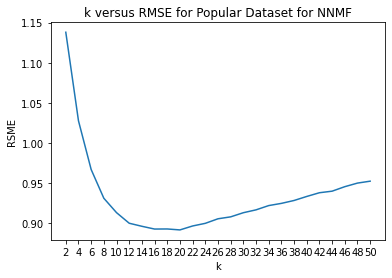

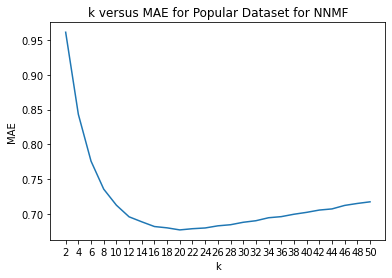

Minimum avg RMSE:  0.8913882930927883
Minimum avg MAE:  0.6772573220180013


In [ ]:
'''
Perform 10-fold cross-validation using a NNMF collaborative filter
and print RMSE and MAE as a function of k on popular dataset
'''

k = np.arange(2, 51, 2)
ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv')
reader = Reader(rating_scale=(0.5,5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader=reader)
nn = NNMF(data, k)
nn.cv_over_k_pop()

nn.plot_rmse_mae_pop()

print("Minimum avg RMSE: ", nn.report_lowest_RMSE_pop())
print("Minimum avg MAE: ", nn.report_lowest_MAE_pop())

###Question 20


In [ ]:
'''
Perform 10-fold cross-validation using a NNMF collaborative filter
and print RMSE and MAE as a function of k on popular dataset
'''

k = np.arange(2, 51, 2)
ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv')
reader = Reader(rating_scale=(0.5,5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader=reader)
nn = NNMF(data, k)
nn.cv_over_k_unpop()
print("Minimum avg RMSE: ", nn.report_lowest_RMSE_unpop())
print("Minimum avg MAE: ", nn.report_lowest_MAE_unpop())
nn.plot_rmse_mae_unpop()

print("Minimum avg RMSE: ", nn.report_lowest_RMSE_unpop())
print("Minimum avg MAE: ", nn.report_lowest_MAE_unpop())

0
2
1
2
3
4
5
6
7
8
9
10
1
4
1
2
3
4
5
6


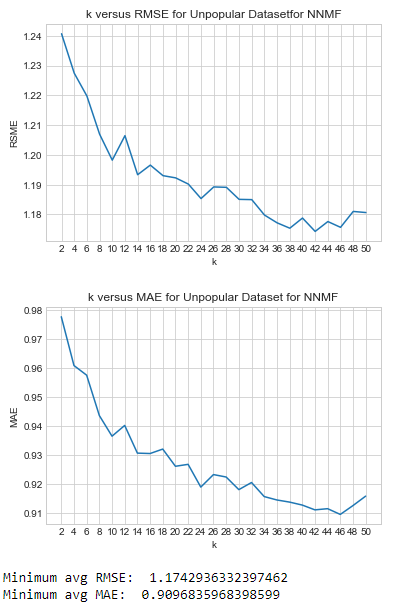

###Question 21


2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum avg RMSE:  0.8827169869620324
Minimum avg MAE:  0.6726525333052182


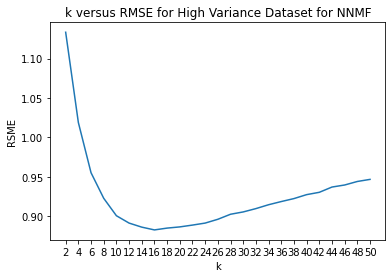

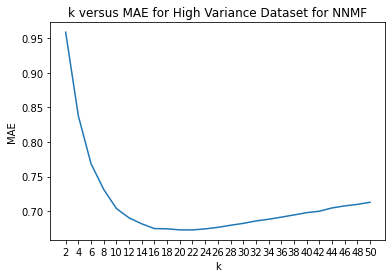

Minimum avg RMSE:  0.8827169869620324
Minimum avg MAE:  0.6726525333052182


In [ ]:
'''
Perform 10-fold cross-validation using a NNMF collaborative filter
and print RMSE and MAE as a function of k on popular dataset
'''

k = np.arange(2, 51, 2)
ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv')
reader = Reader(rating_scale=(0.5,5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader=reader)
nn = NNMF(data, k)
nn.cv_over_k_highvar()
print("Minimum avg RMSE: ", nn.report_lowest_RMSE_highvar())
print("Minimum avg MAE: ", nn.report_lowest_MAE_highvar())
nn.plot_rmse_mae_highvar()

print("Minimum avg RMSE: ", nn.report_lowest_RMSE_highvar())
print("Minimum avg MAE: ", nn.report_lowest_MAE_highvar())

###Question 22

(274, 70286, 3.5)
[Prediction(uid=274, iid=70286, r_ui=3.5, est=3.824643405085559, details={'was_impossible': False}), Prediction(uid=288, iid=2, r_ui=2.0, est=3.4719971812445385, details={'was_impossible': False}), Prediction(uid=317, iid=5630, r_ui=5.0, est=3.347026490375659, details={'was_impossible': False}), Prediction(uid=298, iid=6870, r_ui=2.0, est=2.778802441333743, details={'was_impossible': False}), Prediction(uid=572, iid=1193, r_ui=5.0, est=4.94284383266381, details={'was_impossible': False}), Prediction(uid=195, iid=866, r_ui=4.0, est=4.025193826259294, details={'was_impossible': False}), Prediction(uid=529, iid=786, r_ui=5.0, est=3.2373875627164796, details={'was_impossible': False}), Prediction(uid=275, iid=5485, r_ui=2.0, est=3.0723198553721307, details={'was_impossible': False}), Prediction(uid=4, iid=937, r_ui=3.0, est=3.4108489306754173, details={'was_impossible': False}), Prediction(uid=104, iid=743, r_ui=2.5, est=2.533715101930158, details={'was_impossible': False

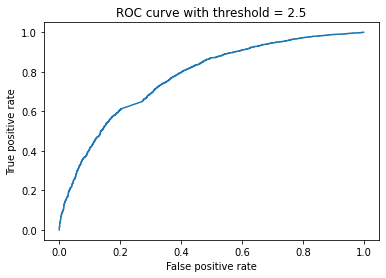

The area under the curve (AUC) value is 0.7745466968431842
(187, 1241, 4.5)
[Prediction(uid=187, iid=1241, r_ui=4.5, est=3.3695797577820272, details={'was_impossible': False}), Prediction(uid=560, iid=36519, r_ui=3.5, est=3.117850438531795, details={'was_impossible': False}), Prediction(uid=474, iid=7050, r_ui=3.5, est=3.75202949187604, details={'was_impossible': False}), Prediction(uid=408, iid=316, r_ui=3.5, est=3.8197511151311048, details={'was_impossible': False}), Prediction(uid=318, iid=4878, r_ui=3.0, est=4.288954508935183, details={'was_impossible': False}), Prediction(uid=414, iid=4027, r_ui=5.0, est=3.9218597159793327, details={'was_impossible': False}), Prediction(uid=380, iid=4492, r_ui=3.0, est=3.280666055645329, details={'was_impossible': False}), Prediction(uid=560, iid=3994, r_ui=4.0, est=3.619080909457695, details={'was_impossible': False}), Prediction(uid=18, iid=109374, r_ui=4.0, est=4.060038932561422, details={'was_impossible': False}), Prediction(uid=380, iid=2005,

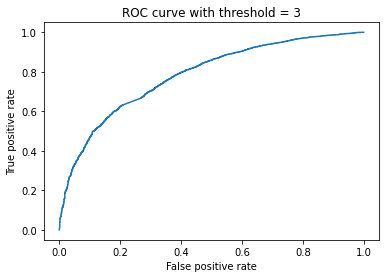

The area under the curve (AUC) value is 0.7829281000033087
(387, 1783, 3.0)
[Prediction(uid=387, iid=1783, r_ui=3.0, est=3.015524794837857, details={'was_impossible': False}), Prediction(uid=379, iid=47, r_ui=3.0, est=3.885115099462105, details={'was_impossible': False}), Prediction(uid=304, iid=150, r_ui=5.0, est=4.011838011216782, details={'was_impossible': False}), Prediction(uid=226, iid=1982, r_ui=3.0, est=3.6714067331628164, details={'was_impossible': False}), Prediction(uid=341, iid=74458, r_ui=5.0, est=4.3008694770017435, details={'was_impossible': False}), Prediction(uid=181, iid=477, r_ui=3.0, est=3.069120991459814, details={'was_impossible': False}), Prediction(uid=167, iid=8604, r_ui=3.0, est=3.699241808211827, details={'was_impossible': False}), Prediction(uid=474, iid=1674, r_ui=4.0, est=3.715242743901355, details={'was_impossible': False}), Prediction(uid=166, iid=3468, r_ui=4.5, est=4.789079912541969, details={'was_impossible': False}), Prediction(uid=483, iid=8016, r_u

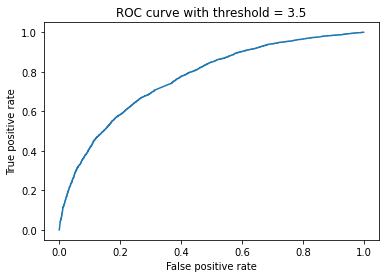

The area under the curve (AUC) value is 0.7673604078133895
(288, 1573, 2.0)
[Prediction(uid=288, iid=1573, r_ui=2.0, est=2.997729721901147, details={'was_impossible': False}), Prediction(uid=420, iid=5349, r_ui=3.5, est=3.534389243229873, details={'was_impossible': False}), Prediction(uid=435, iid=2023, r_ui=5.0, est=3.8082993951213684, details={'was_impossible': False}), Prediction(uid=220, iid=3948, r_ui=4.5, est=3.371608933412423, details={'was_impossible': False}), Prediction(uid=318, iid=56174, r_ui=4.0, est=3.7461496615899708, details={'was_impossible': False}), Prediction(uid=370, iid=5952, r_ui=4.5, est=3.8398657851811864, details={'was_impossible': False}), Prediction(uid=129, iid=4306, r_ui=3.5, est=4.417357833442223, details={'was_impossible': False}), Prediction(uid=212, iid=83134, r_ui=3.5, est=3.6539321761638424, details={'was_impossible': False}), Prediction(uid=28, iid=27450, r_ui=2.5, est=3.499955923836389, details={'was_impossible': True, 'reason': 'User and item are 

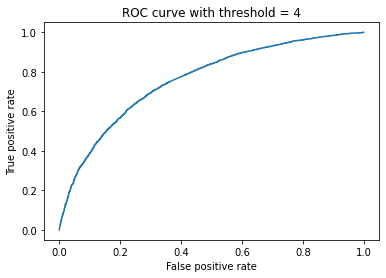

The area under the curve (AUC) value is 0.7603724037308696


In [ ]:
'''
Plot the ROC for the NNMF collaborative filter for the threshold values [ 2.5, 3, 3.5, 4]

For each of the plots, also report the area under the curve
'''


from surprise.model_selection.validation import cross_validate
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from surprise.model_selection.split import train_test_split


threshold_vals = [ 2.5, 3, 3.5, 4]

ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv')  
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)


for threshold in threshold_vals:
    algo = NMF(n_factors = 20, biased = False) 
    trainset, testset = train_test_split(data, test_size=0.1)
    algo.fit(trainset)
    pred = algo.test(testset)
    print(testset[0])
    print(pred)
    y_true = []
    y_score = []
    #each is a column for the testset
    ###checking the  rating against the threshold.
    for i in range(len(pred)):
        y_score.append(pred[i].est)

        if testset[i][2] >= threshold: #ratings threshold
            y_true.append(1)
        else:
            y_true.append(0)
 
          
         
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    auc_ = roc_auc_score(y_true,  y_score)

    plt.plot(fpr,tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve with threshold = {}'.format(threshold))
    plt.show()
    print('The area under the curve (AUC) value is {}'.format(auc_))

###Question 23

In [ ]:
'''
Find genre of top movies in the first 3 columns of the movie latent factor matrix
'''

from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
from surprise import Reader
from surprise import Dataset

ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv')
reader = Reader(rating_scale=(0.5,5.0))
train_data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader=reader)
nnmf = NMF(n_factors=20, biased=False)
trainset = train_data.build_full_trainset()
nnmf.fit(trainset)
user = nnmf.pu
item = nnmf.qi

total_ids = ratings_df['movieId']
ordered_ids = []
for i in range(0,len(total_ids)):
    if total_ids[i] not in ordered_ids:
        ordered_ids.append(total_ids[i])
#print(len(ordered_ids))
ids_item_col_1 = np.zeros((len(ordered_ids),2))
ids_item_col_1[:,0] = ordered_ids[:]
ids_item_col_1[:,1] = item[:,0]
sorted_col1 = np.flip(ids_item_col_1[np.argsort(ids_item_col_1[:, 1])],0)

ids_item_col_2 = np.zeros((len(ordered_ids),2))
ids_item_col_2[:,0] = ordered_ids[:]
ids_item_col_2[:,1] = item[:,1]
sorted_col2 = np.flip(ids_item_col_2[np.argsort(ids_item_col_2[:, 1])],0)

ids_item_col_3 = np.zeros((len(ordered_ids),2))
ids_item_col_3[:,0] = ordered_ids[:]
ids_item_col_3[:,1] = item[:,2]
sorted_col3 = np.flip(ids_item_col_3[np.argsort(ids_item_col_3[:, 1])],0)
movies_df = pd.read_csv('/content/drive/MyDrive/movies.csv')
movieId = movies_df['movieId']
genre = movies_df['genres']
print('Genres for top 10 movies in column 1 \n')
for i in range(0,10):
    print(genre[np.where(movieId == sorted_col1[i,0])[0]])

print('\n \n \n Genres for top 10 movies in column 2 \n')
for i in range(0,10):
    print(genre[np.where(movieId == sorted_col2[i,0])[0]])
    
print('\n \n \n Genres for top 10 movies in column 3 \n')
for i in range(0,10):
    print(genre[np.where(movieId == sorted_col3[i,0])[0]])

Genres for top 10 movies in column 1 

1533    Drama|Fantasy|Mystery
Name: genres, dtype: object
2423    Drama
Name: genres, dtype: object
683    Comedy|Musical
Name: genres, dtype: object
6539    Action|Comedy|Crime|Thriller
Name: genres, dtype: object
1937    Action|Crime
Name: genres, dtype: object
2208    Comedy|Romance
Name: genres, dtype: object
1482    Comedy
Name: genres, dtype: object
726    Comedy|Drama|War
Name: genres, dtype: object
7857    Comedy
Name: genres, dtype: object
1898    Drama
Name: genres, dtype: object

 
 
 Genres for top 10 movies in column 2 

7114    Fantasy|Horror
Name: genres, dtype: object
2829    Comedy
Name: genres, dtype: object
8661    Adventure|Children|Comedy
Name: genres, dtype: object
3688    Comedy
Name: genres, dtype: object
7584    Comedy|Documentary
Name: genres, dtype: object
7678    Drama
Name: genres, dtype: object
3666    Adventure|Children|Comedy
Name: genres, dtype: object
5867    Drama|War
Name: genres, dtype: object
8227    Comedy|Dr

## Matrix factorization with bias

In [ ]:
'''
Define functions used in Questions 24-29
'''

from surprise import Reader
from surprise import Dataset
from surprise.prediction_algorithms.matrix_factorization import SVD 
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import accuracy
import matplotlib.pyplot as plt


class MF_Bias:
    '''
    Class to design an 10-fold cross validation using MF w/ bias collaborative
    filtering over different values of k
    '''

    def __init__(self, ratings_df, k, trim=False):
        '''
        data: data this is performed on; a DataFrame
        k: a list storing the values of k
        '''
        if trim=True:
            self.ratings_df = ratings_df

            # count number of ratings
            self.num_ratings = count_movie_ratings(self.ratings_df)

            # define popular movies: movies that have recieved more than 2 ratings
            self.popular = np.where(self.num_ratings > 2)[0] 

            # define high-variance movies: movies that have recieved at least 5
            # ratings and have variance of rating values recieved of at least 2
            var_movies = count_movie_variability(self.ratings_df)
            self.high_var = []
            for i in np.where(self.num_ratings >= 5)[0]:
                if len(np.unique(var_movies[i:])) >= 2:
                    self.high_var.append(i)

        # load data in format that SVD can use
        reader = Reader(rating_scale=(1.0,5.0))
        self.data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']],
                                         reader=reader) 
        self.k = k


    def trim_popular(self, testset):
        '''
        Trims testset so that only movies in popular and unpopular trimmed
        subsets movies remain

        Returns trimmed testset lists
        '''
        pop_test = []
        unpop_test = []
        for i in np.arange(len(testset)):
            for j in self.popular:
                # if movie is in the popular subset
                if j == testset[i][1]:
                    pop_test.append(testset[i])
                    break
                # since subset_movies is ordered from least to greatest,
                # if j > testset[i][1], then we know testset[i][1] is not in 
                # popular set, so therefore it is in the unpopluar set
                elif j > testset[i][1]:
                    unpop_test.append(testset[i])
                    break 
        return pop_test, unpop_test


    def trim_var(self, testset):
        '''
        Trims testset so that only movies in high variance trimmed movies subsets
        movies remain

        Returns trimmed testset lists
        '''
        var_test = []
        for i in np.arange(len(testset)):
            for j in np.arange(len(self.high_var)):
                # if movie is in the popular subset
                if j == testset[i][1]:
                    var_test.append(testset[i])
                    break
                # since subset_movies is ordered from least to greatest,
                # if j > testset[i][1], then we know testset[i][1] is not in 
                # high variance data set
                elif j > testset[i][1]:
                    break
        return var_test


    def predict(self):
        '''
        Performs 10-fold cv over different values of k for full data set

        Returns average RMSE and MAE for each value of k
        '''
        rmse = np.zeros(len(self.k))
        mae = np.zeros(len(self.k))
        for i in np.arange(len(k)):
            print(k[i])
            mf_bias = cross_validate(algo=SVD(n_factors=k[i], biased=True),
                             data=self.data, cv=10, n_jobs=-1)
            rmse[i] = mf_bias['test_rmse'].mean()
            mae[i] = mf_bias['test_mae'].mean()
        
        return rmse, mae


    def predict_trim(self):
        '''
        Trains the MF w/ bias collaborative filter across 10-folds for different
        values of k and evaluates performance on popular, unpopular, and high
        variance validation sets

        Returns average RMSE across folds for all trimmed test sets
        '''

        rmse_pop = np.zeros(len(self.k))
        rmse_unpop = np.zeros(len(self.k))
        rmse_var = np.zeros(len(self.k))

        for i in np.arange(len(self.k)):
            print(k[i])

            # split data in 10 folds
            kf = KFold(n_splits=10)
            # define MF w/ bias collaborative filter
            mf_bias = SVD(n_factors=k[i], biased=True)

            total_RMSE_pop = 0 
            total_RMSE_unpop = 0
            total_RMSE_var = 0
            for trainset, testset in kf.split(self.data):

                # train and test algorithm
                mf_bias.fit(trainset)
                pop_test, unpop_test = self.trim_popular(testset) 
                var_test = self.trim_var(testset)
                pred_pop = mf_bias.test(pop_test)
                pred_unpop = mf_bias.test(unpop_test)
                pred_var = mf_bias.test(var_test)

                # compute RMSEs for fold
                total_RMSE_pop += accuracy.rmse(pred_pop, verbose=False)
                total_RMSE_unpop += accuracy.rmse(pred_unpop, verbose=False)
                total_RMSE_var += accuracy.rmse(pred_var, verbose=False)
                
            rmse_pop[i] = total_RMSE_pop / 10
            rmse_unpop[i] = total_RMSE_unpop / 10
            rmse_var[i] = total_RMSE_var / 10
            
            print("Popular RMSE: ", rmse_pop[i])
            print("Unpopular RMSE: ", rmse_unpop[i])
            print("High variation RMSE: ", rmse_var[i])
            print()

        return rmse_pop, rmse_unpop, rmse_var


def plot_rmse_mae(rmse, mae=None):
    '''
    Plots RMSE and MAE as a function of k
    '''

    if mae is not None:
        # Plot MAE as a function of k
        plt.plot(k, mae)
        plt.title("k versus MAE")
        plt.xlabel("k")
        plt.xticks(k)
        plt.ylabel("MAE")
        plt.show()
        
    # Plot RMSE as a function of k
    plt.plot(k, rmse)
    plt.title("k versus RMSE")
    plt.xlabel("k")
    plt.xticks(k)
    plt.ylabel("RSME")
    plt.show()


def report_lowest_RMSE(rmse, k):
    '''
    Returns minimum average RMSE value
    '''
    print("Minimum RMSE value: ", np.min(rmse))
    print("at k: ", k[np.argmin(rmse)])
    return np.min(rmse)

def report_lowest_MAE(mae, k):
    '''
     Returns minimum average MAE value
    '''
    print("Minimum MAE value: ", np.min(mae))
    print("at k: ", k[np.argmin(mae)])
    return np.min(mae)



def count_movie_ratings(ratings_df):
    '''
    Counts the number of times each movie was rated

    Returns an array where the index corresonds to the movieId and the value of 
    the index corresponds to the number of times the movie was rated
    '''
    num_movies = np.max(np.unique(ratings_df['movieId']))
    num_ratings = np.zeros(num_movies)
    # loop through the rows of ratings.df and count the number of times each 
    # movie was rated
    for i in np.arange(ratings_df.shape[0]):
        row_i = ratings_df.loc[i]
        movie_id = int(row_i[1]-1)
        num_ratings[movie_id] += 1
    return num_ratings


def count_movie_variability(ratings_df):
    '''
    Counts the variability in movie ratings

    Returns an array where the index corresponds to the movieId and the value of
    each column corresponds to the number of times the movie was given 
    rating = (column # +1) 
    '''
    num_movies = np.max(np.unique(ratings_df['movieId']))
    var_ratings = np.zeros((num_movies, 5))
    # loop through the rows of ratings.df and count the number of times each 
    # movie was given a certain ratings
    for i in np.arange(ratings_df.shape[0]):
        row_i = ratings_df.loc[i]
        movie_id = int(row_i[1]-1)
        rating = int(row_i[2])
        var_ratings[movie_id, rating-1] += 1
    return var_ratings

### Question 24-25

In [ ]:
'''
Perform 10-fold cross-validation using a MF w/ bias collaborative filter
'''

ratings_df = pd.read_csv('/content/drive/MyDrive/ECE_219/3. Project 3 - Recommendation Systems/ml-latest-small/ratings.csv')

# compute RMSE and MAE as a function of k, and plot results
k = np.arange(2, 51, 2)
mfb = MF_Bias(ratings_df, k)
rmse, mae = mfb.predict()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


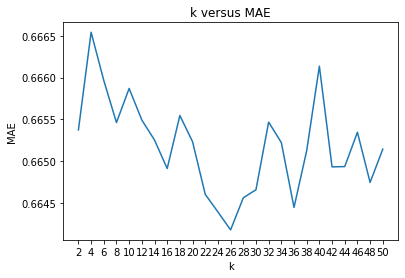

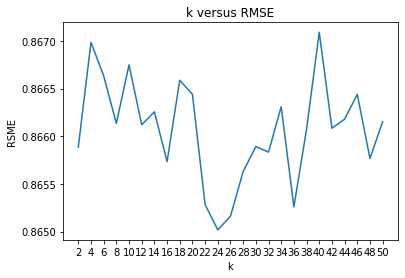



Lowest RMSE value:  0.8650177477892804
at k:  24
Minimum avg RMSE:  0.8650177477892804
Lowest MAE value:  0.6641759911187284
at k:  26
Minimum avg MAE:  0.6641759911187284


In [ ]:
'''
Plot RMSE and MAE as a function of k and report the minimum RMSE and MAE
'''

plot_rmse_mae(rmse, mae)
print()
print()
print("Minimum avg RMSE: ", report_lowest_RMSE(rmse, k))
print("Minimum avg MAE: ", report_lowest_MAE(mae, k))

### Question 26-28

In [ ]:
''' 
Perform 10-fold cross-validation using a MF w/ bias collaborative filer on the 
populur, unpopular, and high variance movie subsets
'''

# load data 
ratings_df = pd.read_csv('/content/drive/MyDrive/ECE_219/3. Project 3 - Recommendation Systems/ml-latest-small/ratings.csv')


# compute RMSE as a function of k for each trimmed data set
k = np.arange(2, 51, 2)
mfb = MF_Bias(ratings_df, k, trim=True)
rmse_pop, rmse_unpop, rmse_var = mfb.predict_trim()

2
Popular RMSE:  0.8682986955207219
Unpopular RMSE:  0.8648462128000152
High variation RMSE:  0.8739938456371131

4
Popular RMSE:  0.8681547070701848
Unpopular RMSE:  0.8655502835275273
High variation RMSE:  0.8745270212971107

6
Popular RMSE:  0.8677755927608825
Unpopular RMSE:  0.8650596318710637
High variation RMSE:  0.8735927529851354

8
Popular RMSE:  0.8678464203150845
Unpopular RMSE:  0.8641511079191042
High variation RMSE:  0.8734010715497433

10
Popular RMSE:  0.8667283741261075
Unpopular RMSE:  0.8650631468365224
High variation RMSE:  0.872237895430802

12
Popular RMSE:  0.8679154835546564
Unpopular RMSE:  0.8647329684886481
High variation RMSE:  0.8729428584156448

14
Popular RMSE:  0.8679161236574672
Unpopular RMSE:  0.864201441096634
High variation RMSE:  0.8733339984549258

16
Popular RMSE:  0.8666855257976479
Unpopular RMSE:  0.8642546545304484
High variation RMSE:  0.8722075077955205

18
Popular RMSE:  0.869311408784163
Unpopular RMSE:  0.8655785410146197
High variation

RMSE for Popular Movies


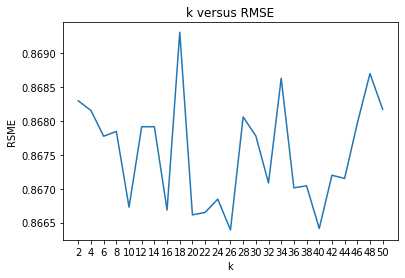



Lowest RMSE value:  0.8663915719248184
at k:  26
Minimum avg RMSE:  0.8663915719248184


In [ ]:
print("RMSE for Popular Movies")
plot_rmse_mae(rmse_pop)
print()
print()
print("Minimum avg RMSE: ", report_lowest_RMSE(rmse_pop, k))

RMSE for Unpopular Movies


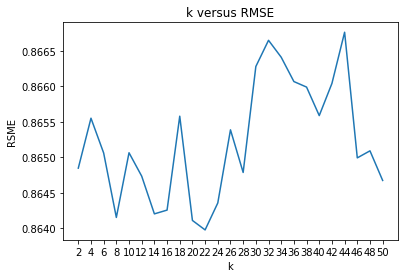



Lowest RMSE value:  0.8639752181683799
at k:  22
Minimum avg RMSE:  0.8639752181683799


In [ ]:
print("RMSE for Unpopular Movies")
plot_rmse_mae(rmse_unpop)
print()
print()
print("Minimum avg RMSE: ", report_lowest_RMSE(rmse_unpop, k))

RMSE for High Variance Movies


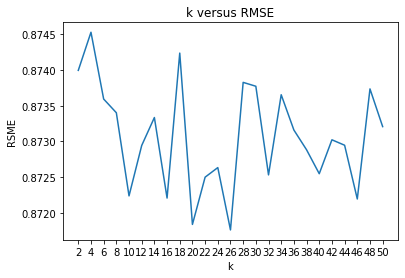



Lowest RMSE value:  0.871761886678672
at k:  26
Minimum avg RMSE:  0.871761886678672


In [ ]:
print("RMSE for High Variance Movies")
plot_rmse_mae(rmse_var)
print()
print()
print("Minimum avg RMSE: ", report_lowest_RMSE(rmse_var, k))

### Question 29

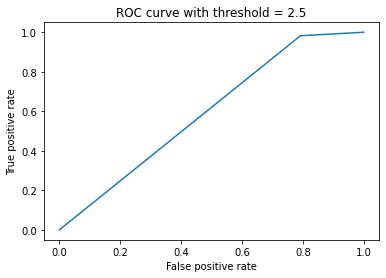

The area under the curve (AUC) value is 0.5949492560397334


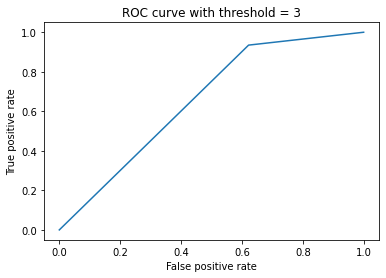

The area under the curve (AUC) value is 0.656460576269807


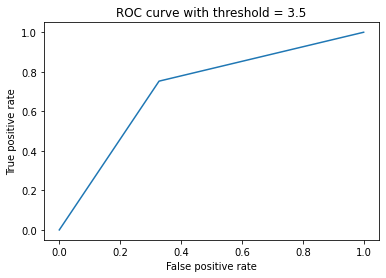

The area under the curve (AUC) value is 0.7124126214595026


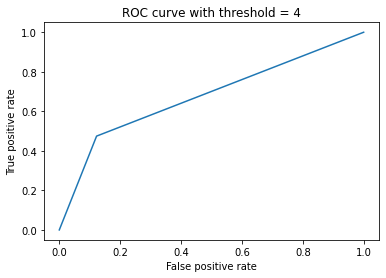

The area under the curve (AUC) value is 0.6760094091600941


In [ ]:
'''
Plot ROC curves for various threshold values and report AUC values
'''

from surprise import Reader
from surprise import Dataset
from surprise.model_selection.split import train_test_split
from surprise.prediction_algorithms.matrix_factorization import SVD 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


# load data in format that SVD can use
ratings_df = pd.read_csv('/content/drive/MyDrive/ECE_219/3. Project 3 - Recommendation Systems/ml-latest-small/ratings.csv')
reader = Reader(rating_scale=(1.0,5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader=reader) 
trainset, testset = train_test_split(data, test_size=0.1)

# define MF w/ bias collaborative filter
k = 26
mf_bias = SVD(n_factors=k, biased=True)

# train filter and predict
mf_bias.fit(trainset)
preds = mf_bias.test(testset)

# print ROC curve for different thresholds
binary_thresholds = [2.5, 3, 3.5, 4]
for t in binary_thresholds:
    y_true = []
    y_pred = []
    for i in np.arange(len(preds)):
        y_pred.append(1 if preds[i].est > t else 0)
        y_true.append(1 if preds[i].r_ui > t else 0)

    fpr, tpr, _ = roc_curve(y_true, y_pred)       
    auc_ = roc_auc_score(y_true,  y_pred)

    plt.plot(fpr,tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve with threshold = {}'.format(t))
    plt.show()
    print('The area under the curve (AUC) value is {}'.format(auc_))                

# Naive Collaborative Filtering

In [ ]:
'''
Functions for Questions 30 - 33
'''
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import KFold
from surprise import accuracy
import matplotlib.pyplot as plt


class Naive:
    '''
    Class to design an 10-fold cross validation using a naive collaborative
    filter
    '''

    def __init__(self, ratings_df, trim=False):
        '''
        data: data this is performed on; a DataFrame
        k: a list storing the values of k
        '''
        self.ratings_df = ratings_df

        if trim==True:
            # count number of ratings for each movie
            self.num_ratings = count_movie_ratings(self.ratings_df)

            # define popular movies: movies that have recieved more than 2 ratings
            self.popular = np.where(self.num_ratings > 2)[0] 

            # define high-variance movies: movies that have recieved at least 5
            # ratings and have variance of rating values recieved of at least 2
            var_movies = count_movie_variability(self.ratings_df)
            self.high_var = []
            for i in np.where(self.num_ratings >= 5)[0]:
                if len(np.unique(var_movies[i:])) >= 2:
                    self.high_var.append(i)


        # count number of ratings for each user
        self.user_ratings = count_user_ratings(self.ratings_df)

        # compute average rating for each user, (mu_i)
        self.avg_ratings = avg_user_rating(self.user_ratings)

        # load data in format that SVD can use
        reader = Reader(rating_scale=(1.0,5.0))
        self.data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']],
                                         reader=reader) 


    def trim_popular(self, testset):
        '''
        Trims testset so that only movies in popular and unpopular trimmed
        subsets movies remain

        Returns trimmed testset lists
        '''
        pop_test = []
        unpop_test = []
        for i in np.arange(len(testset)):
            for j in self.popular:
                # if movie is in the popular subset
                if j == testset[i][1]:
                    pop_test.append(testset[i])
                    break
                # since subset_movies is ordered from least to greatest,
                # if j > testset[i][1], then we know testset[i][1] is not in 
                # popular set, so therefore it is in the unpopluar set
                elif j > testset[i][1]:
                    unpop_test.append(testset[i])
                    break 
        return pop_test, unpop_test

    def trim_var(self, testset):
        '''
        Trims testset so that only movies in high variance trimmed movies subsets
        movies remain

        Returns trimmed testset lists
        '''
        var_test = []
        for i in np.arange(len(testset)):
            for j in np.arange(len(self.high_var)):
                # if movie is in the popular subset
                if j == testset[i][1]:
                    var_test.append(testset[i])
                    break
                # since subset_movies is ordered from least to greatest,
                # if j > testset[i][1], then we know testset[i][1] is not in 
                # high variance data set
                elif j > testset[i][1]:
                    break
        return var_test


    def find_fold_error(self, testset):
        '''
        Determine error for one fold of k-fold cross validation

        Returns error for that fold
        '''
        fold_error = 0
        for i in np.arange(len(testset)):
            # find userId in test set
            userId = testset[i][0]-1
            # find avg move rating for user
            pred_rating = self.avg_ratings[userId]
            # compute error and add to running error total
            fold_error += (testset[i][2] - pred_rating)**2
        return fold_error


    def predict(self):
        '''
        Trains the naive collaborative filter across 10-fold and evaluates
        performance on validation set

        Returns: avg RMSE for all folds
        '''
        kf = KFold(n_splits=10)
        total_RMSE=0
        for trainset, testset in kf.split(self.data):            
            fold_error = self.find_fold_error(testset)
            total_RMSE += np.sqrt(fold_error / len(testset))
        avg_RMSE = total_RMSE / 10
        return avg_RMSE


    def predict_on_trim(self):
        '''
        Trains the naive collaborative filter across 10-fold and evaluates
        performance on validation set (a subset of movies)

        Returns: avg RMSE for all folds for each trimmed set
        '''
        total_RMSE_pop = 0
        total_RMSE_unpop = 0
        total_RMSE_var = 0

        kf = KFold(n_splits=10)
        for trainset, testset in kf.split(self.data):
            # trim testset
            pop_test, unpop_test = self.trim_popular(testset) 
            var_test = self.trim_var(testset)
            # calculate error for fold
            fold_error_pop = self.find_fold_error(pop_test)
            fold_error_unpop = self.find_fold_error(unpop_test)
            fold_error_var = self.find_fold_error(var_test)

            # add fold RMSE to total RMSE
            print("Popular RMSE:, ", np.sqrt(fold_error_pop / len(pop_test)))
            total_RMSE_pop += np.sqrt(fold_error_pop / len(pop_test))
            print("Unpopular RMSE:, ", np.sqrt(fold_error_unpop / len(unpop_test)))
            total_RMSE_unpop += np.sqrt(fold_error_unpop / len(unpop_test))
            print("High variance RMSE:, ", np.sqrt(fold_error_var / len(var_test)))
            total_RMSE_var += np.sqrt(fold_error_var / len(var_test))
            print()

        avg_RMSE_pop = total_RMSE_pop / 10
        avg_RMSE_unpop = total_RMSE_unpop / 10
        avg_RMSE_var = total_RMSE_var / 10
        return avg_RMSE_pop, avg_RMSE_unpop, avg_RMSE_var



def count_movie_ratings(ratings_df):
    '''
    Counts the number of times each movie was rated

    Returns an array where the index corresonds to the movieId and the value of 
    the index corresponds to the number of times the movie was rated
    '''
    num_movies = np.max(np.unique(ratings_df['movieId']))
    num_ratings = np.zeros(num_movies)
    # loop through the rows of ratings.df and count the number of times each 
    # movie was rated
    for i in np.arange(ratings_df.shape[0]):
        row_i = ratings_df.loc[i]
        movie_id = int(row_i[1]-1)
        num_ratings[movie_id] += 1
    return num_ratings

def count_movie_variability(ratings_df):
    '''
    Counts the variability in movie ratings

    Returns an array where the index corresponds to the movieId and the value of
    each column corresponds to the number of times the movie was given 
    rating = (column # +1) 
    '''
    num_movies = np.max(np.unique(ratings_df['movieId']))
    var_ratings = np.zeros((num_movies, 5))
    # loop through the rows of ratings.df and count the number of times each 
    # movie was given a certain ratings
    for i in np.arange(ratings_df.shape[0]):
        row_i = ratings_df.loc[i]
        movie_id = int(row_i[1]-1)
        rating = int(row_i[2])
        var_ratings[movie_id, rating-1] += 1
    return var_ratings


def count_user_ratings(ratings_df):
    '''
    Counts the number of times each user rated a movie

    Returns an array where the row index corresponds to userId, and the values 
    in the columns correspond to the number of movies the person gave that
    rating to
    '''
    num_users = np.max(np.unique(ratings_df['userId']))
    user_ratings = np.zeros((num_users, 5))
    for i in np.arange(ratings_df.shape[0]):
        row_i = ratings_df.loc[i]
        user_id = int(row_i[0]-1)
        rating = int(row_i[2])
        user_ratings[user_id, rating-1] += 1
    return user_ratings

def avg_user_rating(user_ratings):
    '''
    Counts avg movie rating for each user 

    Returns an array where the index number corresponds to userId and the value
    of the index corresponds to the average rating for that given user
    '''
    avg_ratings = np.zeros(user_ratings.shape[0])
    for n in np.arange(user_ratings.shape[0]):
        row_n = user_ratings[n,:]
        num_movies_rated = np.sum(row_n)
        total_ratings = 0 
        for i in np.arange(len(row_n)):
            total_ratings += (i+1) * row_n[i]

        avg_ratings[n] = total_ratings / num_movies_rated
    return avg_ratings

## Question 30

In [ ]:
'''
Perform 10-fold cross-validation using a naice collaborative filter
'''

from surprise import Reader
from surprise import Dataset
from surprise.model_selection import KFold


# load data 
ratings_df = pd.read_csv('/content/drive/MyDrive/ECE_219/3. Project 3 - Recommendation Systems/ml-latest-small/ratings.csv')

# define naive filter and get RMSE of predictions
naive = Naive(ratings_df)
avg_RMSE = naive.predict()
print("avg RMSE: ", avg_RMSE)


avg RMSE:  0.9523262510567827


## Question 31 - 33

In [ ]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import KFold


# load data 
ratings_df = pd.read_csv('/content/drive/MyDrive/ECE_219/3. Project 3 - Recommendation Systems/ml-latest-small/ratings.csv')

# define naive filter and get RMSE of predictions
naive = Naive(ratings_df, trim=True)
avg_RMSE_pop, avg_RMSE_unpop, avg_RMSE_var = naive.predict_on_trim()
print("avg Popular RMSE: ", avg_RMSE_pop)
print()
print("avg Unpopular RMSE: ", avg_RMSE_unpop)
print()
print("avg High Variance RMSE: ", avg_RMSE_var)

Popular RMSE:,  0.9825866975143619
Unpopular RMSE:,  0.9321266225301313
High variance RMSE:,  0.9825921297776363

Popular RMSE:,  0.9526596342166747
Unpopular RMSE:,  0.9417379909679282
High variance RMSE:,  0.9679738788912152

Popular RMSE:,  0.9793705049921972
Unpopular RMSE:,  0.9435409073938429
High variance RMSE:,  0.9784851721176717

Popular RMSE:,  0.9547556197721074
Unpopular RMSE:,  0.9527948469846832
High variance RMSE:,  0.9646345194200495

Popular RMSE:,  0.9398641673886649
Unpopular RMSE:,  0.9486819001662301
High variance RMSE:,  0.9592063012096851

Popular RMSE:,  0.9612202924520884
Unpopular RMSE:,  0.9515918439864646
High variance RMSE:,  0.9734623881427328

Popular RMSE:,  0.9671545470105216
Unpopular RMSE:,  0.9390745697592052
High variance RMSE:,  0.9680193056460937

Popular RMSE:,  0.96309936930674
Unpopular RMSE:,  0.9215409793417684
High variance RMSE:,  0.9703616734107211

Popular RMSE:,  0.9558445291476694
Unpopular RMSE:,  0.9363951465936508
High variance RMSE

# Performance Comparison

## Question 34

Computing the pearson similarity matrix...
Done computing similarity matrix.


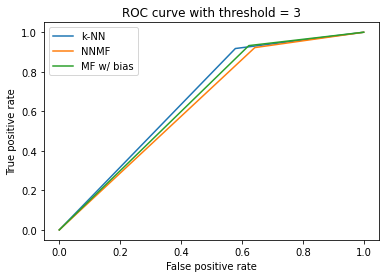

In [ ]:
'''
Plot ROC curves for threshold=3 for each of k-NN, NNMF, and MF w/ bias to 
compare their performance
'''

from surprise import Reader
from surprise import Dataset
from surprise.model_selection.split import train_test_split
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.prediction_algorithms.matrix_factorization import SVD 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


# load data in format that SVD can use
ratings_df = pd.read_csv('/content/drive/MyDrive/ECE_219/3. Project 3 - Recommendation Systems/ml-latest-small/ratings.csv')
reader = Reader(rating_scale=(1.0,5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader=reader) 
trainset, testset = train_test_split(data, test_size=0.1)

# train k-NN collaborative filter, get TPR and FPR
knn = KNNWithMeans(k=14, sim_options={'name': 'pearson'}) 
knn.fit(trainset)
preds = knn.test(testset)
y_true = []
y_pred = []
for i in np.arange(len(preds)):
    y_pred.append(1 if preds[i].est > 3 else 0)
    y_true.append(1 if preds[i].r_ui > 3 else 0)
knn_fpr, knn_tpr, _ = roc_curve(y_true, y_pred)

# train NNMF collaborative filter, get TPR and FPR
nnmf = NMF(n_factors=20, biased=False)
nnmf.fit(trainset)
preds = nnmf.test(testset)
y_true = []
y_pred = []
for i in np.arange(len(preds)):
    y_pred.append(1 if preds[i].est > 3 else 0)
    y_true.append(1 if preds[i].r_ui > 3 else 0)
nnmf_fpr, nnmf_tpr, _ = roc_curve(y_true, y_pred)

# train MF w/ bias collaborative filter, get TPR and FPR
mf_bias = SVD(n_factors=26, biased=True)
mf_bias.fit(trainset)
preds = mf_bias.test(testset)
y_true = []
y_pred = []
for i in np.arange(len(preds)):
    y_pred.append(1 if preds[i].est > 3 else 0)
    y_true.append(1 if preds[i].r_ui > 3 else 0)
mf_fpr, mf_tpr, _ = roc_curve(y_true, y_pred)


# print ROC curve
plt.plot(knn_fpr, knn_tpr, label='k-NN')
plt.plot(nnmf_fpr, nnmf_tpr, label='NNMF')
plt.plot(mf_fpr, mf_tpr, label='MF w/ bias')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve with threshold = 3')
plt.legend()
plt.show()

# Ranking

### Question 36

In [ ]:
'''
QUESTION 36: Plot average precision (Y-axis) against t (X-axis) for the ranking obtained 
using k-NN collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) 
and average precision (Y-axis) against average recall (X-axis).
'''

from collections import defaultdict
from surprise.model_selection.validation import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pdb
from surprise import SVD
from surprise import Dataset
import time 

# code from surprise: https://surprise.readthedocs.io/en/stable/FAQ.html



def precision_recall_at_k_for_t_items(predictions, t, threshold=3):
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        
        # Number of recommended items is t
        n_rec_k = t
        
        # Number of relevant and recommended items in top t
        n_rel_and_rec_k = 0
        for i in range(t):
            if user_ratings[i][1] >= threshold:
                n_rel_and_rec_k += 1
        
        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel

    return precisions, recalls

            

def top_t_items(testset, t, threshold=3):              
    final = []
    dict1 = {}
    dict2 = {}

    for (x, y, z) in testset: #(x= uid, y = moviedid, rating)
        if x not in  dict1:
             dict1[x] = 0 #if uid not in dict1 append 
        dict1[x] += 1
        if x not in  dict2: #if uid is not in dict2 then append
            dict2[x] = 0
        if z >= threshold: # if movie rating is greater than our threshold 
            dict2[x] += 1 #increase the value of uid
                               
    for (x, y, z) in testset:
        if dict1[x] >= t and dict2[x] > 0: #if the uid is greater 
          final.append((x, y, z )) #than our threshold and greater than 
    return final #return a valid movieid,userid, rating tuple 
  


ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv')  
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

t1= time.time()

k_folds = KFold(10)
threshold = 3
#values = list(range(1, 26))
values = np.arange(1, 26)
results = np.zeros((2, 26))



for t in values:
        recall_values = []
        precision_values = []
        for trainset, testset in k_folds.split(data):

            algo = KNNWithMeans(k=14, sim_options={'name': 'pearson'})
            #as usual fit on trainset
            algo.fit(trainset)

            testset_ = top_t_items(testset, t, threshold=3)
            predictions = algo.test(testset_)
            #return predictions on the testset for which the conditions for t and g are met
           
            precisions, recalls = precision_recall_at_k_for_t_items(predictions, t, threshold=3)
            #average over the fold
            precision_mean = sum(prec for prec in precisions.values()) / len(precisions)
            recall_mean = sum(rec for rec in recalls.values()) / len(recalls)
            #store
            precision_values.append(precision_mean)
            recall_values.append(recall_mean)
        #average 
        results[1,t]= np.mean(precision_values) #results 1 is precision
        results[0,t] = np.mean(recall_values)  #results 0 is recall 
      
     

final_time = time.time() - t1
k_final_values= np.copy(results)
print('This took {} seconds'.format(final_time))


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

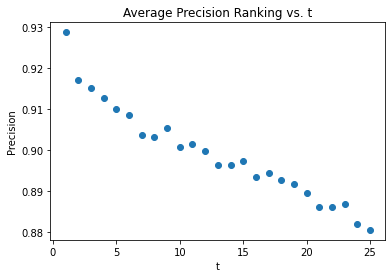

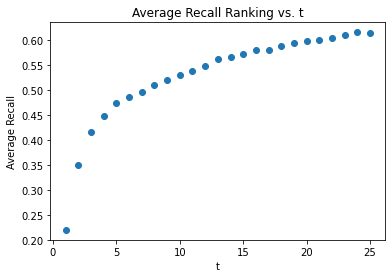

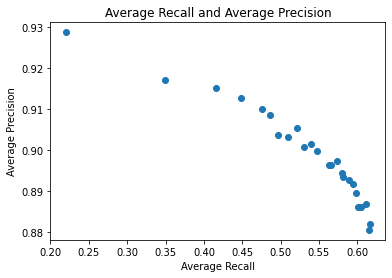

In [ ]:

plt.title('Average Precision Ranking vs. t')
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.ylabel('Precision')
plt.scatter(values,results[1, 1:26])
plt.show() 

plt.title('Average Recall Ranking vs. t')
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.scatter(values, results[0, 1:26])
plt.show()

precision_final = results[1, 1:26]
recall_final = results[0, 1:26]

plt.title('Average Recall and Average Precision')
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.scatter(results[0, 1:26], results[1, 1:26])
plt.show() 


###Question 37

In [ ]:
'''
QUESTION 37: Plot average precision (Y-axis) against t (X-axis) for the ranking obtained 
using NMF collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) 
and average precision (Y-axis) against average recall (X-axis).
'''

from collections import defaultdict
from surprise.model_selection.validation import cross_validate
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pdb
from surprise import SVD
from surprise import Dataset
import time 

# code from surprise: https://surprise.readthedocs.io/en/stable/FAQ.html



def precision_recall_at_k_for_t_items(predictions, t, threshold=3):
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        
        # Number of recommended items is t
        n_rec_k = t
        
        # Number of relevant and recommended items in top t
        n_rel_and_rec_k = 0
        for i in range(t):
            if user_ratings[i][1] >= threshold:
                n_rel_and_rec_k += 1
        
        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel

    return precisions, recalls

            

def top_t_items(testset, t, threshold=3):              
    final = []
    dict1 = {}
    dict2 = {}

    for (x, y, z) in testset: #(x= uid, y = moviedid, rating)
        if x not in  dict1:
             dict1[x] = 0 #if uid not in dict1 append 
        dict1[x] += 1
        if x not in  dict2: #if uid is not in dict2 then append
            dict2[x] = 0
        if z >= threshold: # if movie rating is greater than our threshold 
            dict2[x] += 1 #increase the value of uid
                               
    for (x, y, z) in testset:
        if dict1[x] >= t and dict2[x] > 0: #if the uid is greater 
          final.append((x, y, z )) #than our threshold and greater than 
    return final #return a valid movieid,userid, rating tuple 
  


ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv')  
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

t1= time.time()

k_folds = KFold(10)
threshold = 3
#values = list(range(1, 26))
values = np.arange(1, 26)
results = np.zeros((2, 26))



for t in values:
        recall_values = []
        precision_values = []
        for trainset, testset in k_folds.split(data):

            algo = NMF(n_factors = 20, biased = False) 
            #as usual fit on trainset
            algo.fit(trainset)

            testset_ = top_t_items(testset, t, threshold=3)
            predictions = algo.test(testset_)
            #return predictions on the testset for which the conditions for t and g are met
           
            precisions, recalls = precision_recall_at_k_for_t_items(predictions, t, threshold=3)
            #average over the fold
            precision_mean = sum(prec for prec in precisions.values()) / len(precisions)
            recall_mean = sum(rec for rec in recalls.values()) / len(recalls)
            #store
            precision_values.append(precision_mean)
            recall_values.append(recall_mean)
        #average 
        results[1,t]= np.mean(precision_values) #results 1 is precision
        results[0,t] = np.mean(recall_values)  #results 0 is recall 
      
     
nmf_final_values = np.copy(results)
final_time = time.time() - t1

print('This took {} seconds'.format(final_time))


This took 1989.286387681961 seconds


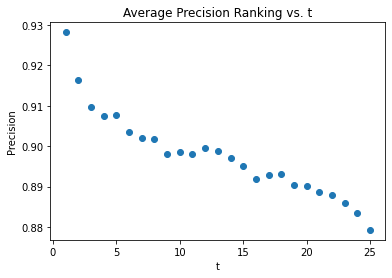

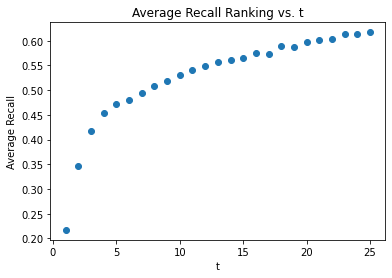

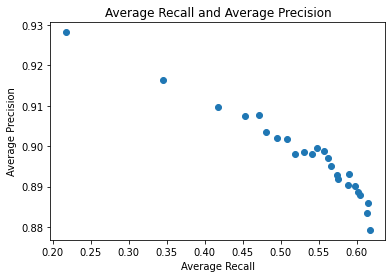

In [ ]:

plt.title('Average Precision Ranking vs. t')
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.ylabel('Precision')
plt.scatter(values,results[1, 1:26])
plt.show() 

plt.title('Average Recall Ranking vs. t')
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.scatter(values, results[0, 1:26])
plt.show()

precision_final = results[1, 1:26]
recall_final = results[0, 1:26]

plt.title('Average Recall and Average Precision')
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.scatter(results[0, 1:26], results[1, 1:26])
plt.show() 


## Question 38

In [ ]:
'''
Plot average precision (Y-axis) against t (X-axis) for the ranking obtained 
using MF w/ bias collaborative filter predictions. Also, plot the average recall
(Y-axis) against t (X-axis) and average precision (Y-axis) against average
recall (X-axis).
'''

from collections import defaultdict
from surprise.model_selection.validation import cross_validate
from surprise.prediction_algorithms.matrix_factorization import SVD 
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
import matplotlib.pyplot as plt 
import pdb
from surprise import SVD
import time 

# code from surprise: https://surprise.readthedocs.io/en/stable/FAQ.html



def precision_recall_at_k_for_t_items(predictions, t, threshold=3):
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        
        # Number of recommended items is t
        n_rec_k = t
        
        # Number of relevant and recommended items in top t
        n_rel_and_rec_k = 0
        for i in range(t):
            if user_ratings[i][1] >= threshold:
                n_rel_and_rec_k += 1
        
        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel

    return precisions, recalls

            

def top_t_items(testset, t, threshold=3):              
    final = []
    dict1 = {}
    dict2 = {}

    for (x, y, z) in testset: #(x= uid, y = moviedid, rating)
        if x not in  dict1:
             dict1[x] = 0 #if uid not in dict1 append 
        dict1[x] += 1
        if x not in  dict2: #if uid is not in dict2 then append
            dict2[x] = 0
        if z >= threshold: # if movie rating is greater than our threshold 
            dict2[x] += 1 #increase the value of uid
                               
    for (x, y, z) in testset:
        if dict1[x] >= t and dict2[x] > 0: #if the uid is greater 
          final.append((x, y, z )) #than our threshold and greater than 
    return final #return a valid movieid,userid, rating tuple 
  


ratings_df = pd.read_csv('/content/drive/MyDrive/ratings.csv')  
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

t1= time.time()

k_folds = KFold(10)
threshold = 3
#values = list(range(1, 26))
values = np.arange(1, 26)
results = np.zeros((2, 26))



for t in values:
        recall_values = []
        precision_values = []
        for trainset, testset in k_folds.split(data):

            algo = SVD(n_factors=26, biased=True)
            #as usual fit on trainset
            algo.fit(trainset)

            testset_ = top_t_items(testset, t, threshold=3)
            predictions = algo.test(testset_)
            #return predictions on the testset for which the conditions for t and g are met
           
            precisions, recalls = precision_recall_at_k_for_t_items(predictions, t, threshold=3)
            #average over the fold
            precision_mean = sum(prec for prec in precisions.values()) / len(precisions)
            recall_mean = sum(rec for rec in recalls.values()) / len(recalls)
            #store
            precision_values.append(precision_mean)
            recall_values.append(recall_mean)
        #average 
        results[1,t]= np.mean(precision_values) #results 1 is precision
        results[0,t] = np.mean(recall_values)  #results 0 is recall 
      
     

final_time = time.time() - t1
mfwb_final_values = np.copy(results)
print('This took {} seconds'.format(final_time))


This took 748.2185685634613 seconds


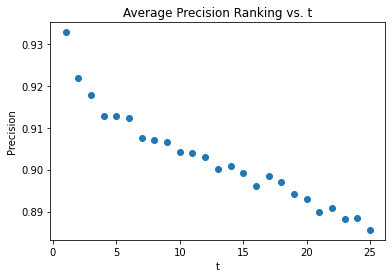

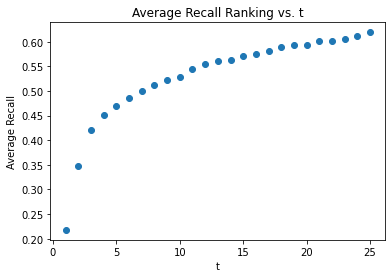

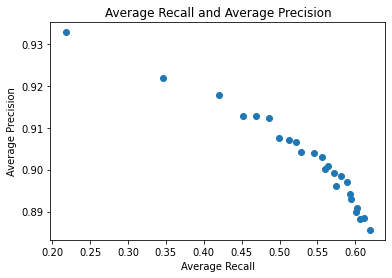

In [ ]:

plt.title('Average Precision Ranking vs. t')
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.ylabel('Precision')
plt.scatter(values,results[1, 1:26])
plt.show() 

plt.title('Average Recall Ranking vs. t')
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.scatter(values, results[0, 1:26])
plt.show()

precision_final = results[1, 1:26]
recall_final = results[0, 1:26]

plt.title('Average Recall and Average Precision')
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.scatter(results[0, 1:26], results[1, 1:26])
plt.show() 


##Question 39

[[0.         0.21799843 0.34535581 0.41638207 0.45170841 0.47042043
  0.48128616 0.49910949 0.50596762 0.52230887 0.53077094 0.5440782
  0.54900693 0.56238721 0.56113431 0.56747563 0.57732803 0.57730336
  0.58499124 0.58784918 0.59532034 0.60198906 0.60346528 0.61383629
  0.61449064 0.61914797]
 [0.         0.92815617 0.91943128 0.91596635 0.90986216 0.9073793
  0.9073594  0.90513933 0.90516715 0.90301168 0.90315636 0.89761302
  0.89726084 0.8979519  0.89528124 0.8950611  0.89395933 0.89207324
  0.89233823 0.89132332 0.88814388 0.88645821 0.88558087 0.88117315
  0.8816116  0.87844306]]
[[0.         0.2203248  0.34672439 0.41756783 0.44810004 0.4693963
  0.48653644 0.49552755 0.50865508 0.52159406 0.53007764 0.53854778
  0.54640952 0.55596872 0.55918293 0.56916761 0.57284914 0.57345978
  0.58667016 0.58881126 0.59838927 0.59909822 0.6042481  0.60924671
  0.62073252 0.62088455]
 [0.         0.92865018 0.91095301 0.90942953 0.90884101 0.9080681
  0.90354421 0.90222442 0.90129221 0.8987703

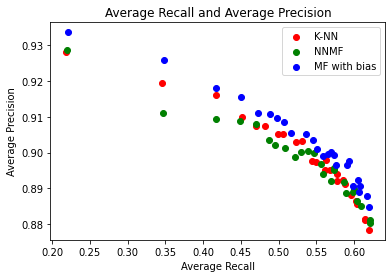

In [ ]:
print(k_final_values)
names= ['K-NN','NNMF', 'MF with bias']     
print(nmf_final_values)
colors=['r','g','b']

plt.title('Average Recall and Average Precision')
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.scatter(k_final_values[0, 1:26], k_final_values[1, 1:26], label = 'K-NN', color= colors[0])
plt.scatter(nmf_final_values[0, 1:26], nmf_final_values[1, 1:26], label = names[1], color= colors[1])
plt.scatter(mfwb_final_values[0, 1:26], mfwb_final_values[1, 1:26], label = names[2], color= colors[2])
plt.legend(names)
plt.show() 